In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [44]:
data = pd.read_csv("/kaggle/input/cardio/cardio_train.csv", sep=";")
data.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [45]:
data.shape

(70000, 13)

In [46]:
data['age']=data['age']/365

In [47]:
data.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1


In [48]:
data = data.astype({'age':'int'})
data = data.astype({'weight':'int'})
data.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62,110,80,1,1,0,0,1,0
1,1,55,1,156,85,140,90,3,1,0,0,1,1
2,2,51,1,165,64,130,70,3,1,0,0,0,1


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB


In [50]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.204329,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395953,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
out_filter = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
data = data[~out_filter]

In [52]:
data.shape

(69007, 13)

In [53]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69007.000000,69007.000000,69007.000000,69007.000000,69007.000000,69007.000000,69007.000000,69007.000000,69007.000000,69007.000000,69007.000000,69007.000000,69007.000000
mean,49967.524077,52.826699,1.348733,164.359601,74.116437,126.295825,81.331503,1.364369,1.225832,0.087861,0.053589,0.803281,0.494877
std,28846.808240,6.770034,0.476573,8.203975,14.328633,17.887107,9.889368,0.678677,0.571784,0.283094,0.225206,0.397521,0.499977
min,0.000000,29.000000,1.000000,55.000000,11.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24996.500000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50006.000000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74860.500000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [55]:
data.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62,110,80,1,1,0,0,1,0
1,1,55,1,156,85,140,90,3,1,0,0,1,1


<Axes: >

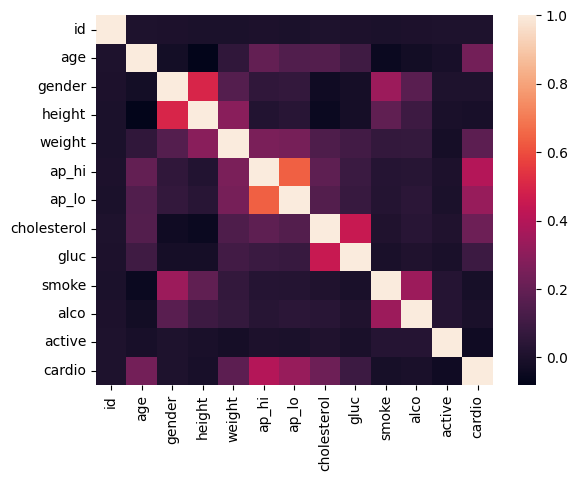

In [56]:
sns.heatmap(data.corr())

In [57]:
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003943,0.003104,-0.002781,-0.001890,0.002238,-0.000564,0.005847,0.002463,-0.003536,0.000617,0.003935,0.003768
age,0.003943,1.000000,-0.023183,-0.080704,0.055054,0.195504,0.150262,0.154925,0.098815,-0.047774,-0.029105,-0.010466,0.239529
gender,0.003104,-0.023183,1.000000,0.497979,0.155920,0.057004,0.064732,-0.036719,-0.020988,0.338631,0.170990,0.005435,0.007528
height,-0.002781,-0.080704,0.497979,1.000000,0.291549,0.017725,0.035772,-0.050458,-0.018514,0.187961,0.094468,-0.007303,-0.010349
weight,-0.001890,0.055054,0.155920,0.291549,1.000000,0.253333,0.244900,0.140653,0.106928,0.066764,0.067908,-0.017904,0.179936
ap_hi,0.002238,0.195504,0.057004,0.017725,0.253333,1.000000,0.640403,0.184674,0.087679,0.028267,0.031589,0.000935,0.397330
ap_lo,-0.000564,0.150262,0.064732,0.035772,0.244900,0.640403,1.000000,0.155291,0.076012,0.024629,0.042926,-0.001061,0.328083
cholesterol,0.005847,0.154925,-0.036719,-0.050458,0.140653,0.184674,0.155291,1.000000,0.450839,0.009868,0.035609,0.008933,0.221385
gluc,0.002463,0.098815,-0.020988,-0.018514,0.106928,0.087679,0.076012,0.450839,1.000000,-0.005660,0.011240,-0.007735,0.089765
smoke,-0.003536,-0.047774,0.338631,0.187961,0.066764,0.028267,0.024629,0.009868,-0.005660,1.000000,0.340291,0.025717,-0.016324


In [58]:
X=data.drop('cardio',axis=1)
y=data['cardio']

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100],  # Number of trees in the forest
    'max_depth': [10], # Maximum depth of the tree
    'min_samples_split': [2],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required at a leaf node
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   5.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   5.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   5.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END max_depth=10, min_samp

In [61]:
y_pred=grid_search.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7323208903315558


In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[6788 1886]
 [2732 5846]]


In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1 = f1_score(y_test, y_pred, average='macro')                

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precision: 0.7345519221656589
Recall: 0.732039718745795
F1-Score: 0.7315204404710403


In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize and train the model
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

# Predict on test data
y_pred = gaussian.predict(X_test)

# Accuracy
acc_gaussian = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Gaussian Naive Bayes Accuracy: {acc_gaussian}%")

# Other evaluation metrics
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

# Display results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", cm)


Gaussian Naive Bayes Accuracy: 71.15%
Precision: 0.7227
Recall: 0.7108
F1 Score: 0.7074
Confusion Matrix:
 [[7156 1518]
 [3460 5118]]


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize and train the model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on test data
y_pred = decision_tree.predict(X_test)

# Accuracy
acc_decision_tree = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Decision Tree Accuracy: {acc_decision_tree}%")

# Other evaluation metrics
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

# Display results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", cm)


Decision Tree Accuracy: 63.22%
Precision: 0.6322
Recall: 0.6322
F1 Score: 0.6322
Confusion Matrix:
 [[5507 3167]
 [3178 5400]]


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 300],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Predict and evaluate
y_pred = grid_search.predict(X_test)
acc_random_forest = round(accuracy_score(y_test, y_pred) * 100, 2)

# Output results
print(f"Random Forest Accuracy: {acc_random_forest}%")
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Random Forest Accuracy: 72.13%
Best Parameters: {'n_estimators': 300}


In [73]:
from xgboost import XGBClassifier
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Define the objective function
def hyperopt_xgb_score(params):
    clf = XGBClassifier(
        learning_rate=params['learning_rate'],
        n_estimators=params['n_estimators'],
        eta=params['eta'],
        max_depth=int(params['max_depth']),
        min_child_weight=params['min_child_weight'],
        subsample=params['subsample'],
        gamma=params['gamma'],
        colsample_bytree=params['colsample_bytree'],
        eval_metric='auc',
        objective='binary:logistic',
        booster='gbtree',
        tree_method='exact',
        verbosity=0,  # replaces deprecated 'silent'
        use_label_encoder=False  # to avoid warning
    )
    score = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=5).mean()
    print(f"AUC: {score:.4f} with params: {params}")
    return {'loss': -score, 'status': STATUS_OK}

# Define hyperparameter space
space_xgb = {
    'learning_rate': hp.quniform('learning_rate', 0.001, 0.05, 0.0005),
    'n_estimators': hp.choice('n_estimators', range(100, 1000)),
    'eta': hp.quniform('eta', 0.025, 0.5, 0.005),
    'max_depth': hp.quniform('max_depth', 2, 12, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 9, 1),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.01),
    'gamma': hp.quniform('gamma', 0, 1, 0.01),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.01),
}

# Run optimization
trials = Trials()
best = fmin(fn=hyperopt_xgb_score, 
            space=space_xgb, 
            algo=tpe.suggest, 
            max_evals=10, 
            trials=trials)

print("\nBest hyperparameters:")
print(best)


AUC: 0.7994 with params: {'colsample_bytree': 0.51, 'eta': 0.47500000000000003, 'gamma': 0.11, 'learning_rate': 0.0085, 'max_depth': 10.0, 'min_child_weight': 5.0, 'n_estimators': 700, 'subsample': 0.71}
AUC: 0.7993 with params: {'colsample_bytree': 0.56, 'eta': 0.255, 'gamma': 0.17, 'learning_rate': 0.0455, 'max_depth': 6.0, 'min_child_weight': 5.0, 'n_estimators': 473, 'subsample': 0.8200000000000001}
AUC: 0.7989 with params: {'colsample_bytree': 0.68, 'eta': 0.335, 'gamma': 0.42, 'learning_rate': 0.005, 'max_depth': 10.0, 'min_child_weight': 6.0, 'n_estimators': 201, 'subsample': 0.91}
AUC: 0.7969 with params: {'colsample_bytree': 0.85, 'eta': 0.165, 'gamma': 0.03, 'learning_rate': 0.007, 'max_depth': 12.0, 'min_child_weight': 4.0, 'n_estimators': 582, 'subsample': 0.92}
AUC: 0.8006 with params: {'colsample_bytree': 0.91, 'eta': 0.07, 'gamma': 0.67, 'learning_rate': 0.006500000000000001, 'max_depth': 7.0, 'min_child_weight': 5.0, 'n_estimators': 431, 'subsample': 0.8}
AUC: 0.7996 wi